# Análise de dados do INE, via a API do INE

## Meta-info sobre os principais indicadores

In [1]:
from smi import get_metainfo_df

df = get_metainfo_df().sort_values(ascending=False, by=["last_update"])
df

,varcd,title,last_update,geo_lastlevel,last_period_available,periodicity,update_type
330,0001400,Exportações (€) de bens,2025-01-09,Agrupamento/País,S3A202411,Mensal,A
277,0012097,Fogos licenciados (N.º) em construções novas p...,2025-01-09,NUTS III,S3A202411,Mensal,A
112,0005718,Exportações (€) de bens,2025-01-09,Agrupamento/País,S18A202411,Mensal acumulado,A
122,0001397,Importações (€) de bens,2025-01-09,Agrupamento/País,S3A202411,Mensal,A
37,0005715,Importações (€) de bens,2025-01-09,Agrupamento/País,S3A202411,Mensal,A
...,...,...,...,...,...,...,...
63,0008243,Índice sintético de desenvolvimento regional (...,2023-06-07,NUTS III,S7A2021,Anual,D
283,0000211,Consumo humano de carne per capita (kg/ hab.),2023-05-25,Portugal,S7A2023,Anual,D
123,0009840,Índice de custo do trabalho (Base - 2016),2023-02-10,Portugal,S5A20224,Trimestral,D
36,0001719,Domínios de Portugal ativos (.pt) (N.º),2022-05-16,Portugal,S7A2021,Anual,D


## Rendimento mediano na RAA

In [22]:
from ine_api import get_df

api_params = {
    "lang": "PT",
    "varcd": "0012757",  # rendimento mediano
    "Dim1": "S7A2022",  # ano 2022
    "Dim2": "<*>200",  # Açores, tão específico quanto possível
}

df_rendimento = get_df(api_params).rename(columns={"valor" : "rendimento_mediano"}, inplace=False)
df_rendimento.loc[~df_rendimento["rendimento_mediano"].isna()]

,ano,geocod,geodsg,sinal_conv,sinal_conv_desc,ind_string,rendimento_mediano
10,2022,200,Região Autónoma dos Açores,None,None,10 776,10776.0
11,2022,2004101,Vila do Porto,None,None,11 198,11198.0
16,2022,200410105,Vila do Porto,None,None,12 667,12667.0
17,2022,2004201,Lagoa (R.A.A.),None,None,10 148,10148.0
20,2022,200420103,Lagoa (Nossa Senhora do Rosário),None,None,11 076,11076.0
21,2022,200420104,Lagoa (Santa Cruz),None,None,9 847,9847.0
23,2022,2004202,Nordeste,None,None,8 604,8604.0
33,2022,2004203,Ponta Delgada,None,None,11 712,11712.0
34,2022,200420301,Arrifes,None,None,10 574,10574.0
36,2022,200420304,Capelas,None,None,11 038,11038.0


## População

In [16]:
api_params_pop_residente = {
    "lang": "PT",
    "varcd": "0012276",  # pop_residente
    "Dim1": "S7A2021",  # ano 2021
    "Dim2": "<*>200",  # Açores, tão específico quanto possível
}

df_pop = get_df(api_params_pop_residente).rename(columns={"valor" : "pop_residente"}, inplace=False)
# não percebo que glitch é este da API mas faltam os primeiros 3 caracteres (200)
df_pop["geocod"] = "200" + df_pop["geocod"]
df_pop

,ano,geocod,geodsg,dim_3,dim_3_t,dim_4,dim_4_t,ind_string,pop_residente
0,2021,200410101,Almagreira,2,M,1,0 - 14 anos,47,47
1,2021,200420310,Ginetes,2,M,1,0 - 14 anos,72,72
2,2021,200420314,Ponta Delgada (São Pedro),2,M,1,0 - 14 anos,488,488
3,2021,200420323,Ajuda da Bretanha,2,M,1,0 - 14 anos,54,54
4,2021,200420404,Nossa Senhora dos Remédios,2,M,1,0 - 14 anos,66,66
...,...,...,...,...,...,...,...,...,...
2635,2021,200460105,Ribeirinha,1,H,T,Total,171,171
2636,2021,200460303,Santo Amaro,1,H,T,Total,120,120
2637,2021,200470107,Horta (Conceição),1,H,T,Total,500,500
2638,2021,200470108,Horta (Matriz),1,H,T,Total,1 161,1161


## RSI

In [18]:
api_params_rsi = {
    "lang": "PT",
    "varcd": "0008339",  # pop_residente
    "Dim1": "S7A2022", 
    "Dim2": "<*>200",  # Açores, tão específico quanto possível
}

df_rsi = get_df(api_params_rsi).rename(columns={"valor" : "rsi"}, inplace=False)
df_rsi



,ano,geocod,geodsg,ind_string,rsi
0,2022,2004502,Velas,"10,64",10.64
1,2022,2004601,Lajes do Pico,"11,94",11.94
2,2022,2004801,Lajes das Flores,"12,62",12.62
3,2022,2004501,Calheta,"12,98",12.98
4,2022,2004603,São Roque do Pico,"13,10",13.10
5,2022,2004602,Madalena,"17,12",17.12
6,2022,2004701,Horta,"17,12",17.12
7,2022,2004802,Santa Cruz das Flores,"17,77",17.77
8,2022,2004901,Corvo,"29,89",29.89
9,2022,2004101,Vila do Porto,"33,67",33.67


## Join data

In [23]:
import pandas as pd
df_ = pd.merge(
    df_rendimento[["geocod", "geodsg", "rendimento_mediano"]],
    df_pop[["geocod", "pop_residente"]],
    on="geocod",
    how="inner",
)
df = pd.merge(
    df_[["geocod", "geodsg", "rendimento_mediano", "pop_residente"]],
    df_rsi[["geocod", "rsi"]],
    on="geocod",
    how="inner",
)
# df[["rendimento_mediano", "pop_residente", "pop_rsi_permilagem"]] = df[
#     ["rendimento_mediano", "pop_residente", "pop_rsi_permilagem"]
# ].apply(pd.to_numeric, errors="coerce")
df.dropna()

,geocod,geodsg,rendimento_mediano,pop_residente,rsi
30,2004101,Vila do Porto,11198.0,387,33.67
31,2004101,Vila do Porto,11198.0,772,33.67
32,2004101,Vila do Porto,11198.0,385,33.67
33,2004101,Vila do Porto,11198.0,310,33.67
34,2004101,Vila do Porto,11198.0,619,33.67
...,...,...,...,...,...
280,2004601,Lajes do Pico,10200.0,1079,11.94
281,2004601,Lajes do Pico,10200.0,462,11.94
282,2004601,Lajes do Pico,10200.0,2214,11.94
283,2004601,Lajes do Pico,10200.0,4340,11.94


## Plot

Text(0.5, 1.0, 'pop_residente as bubble size')

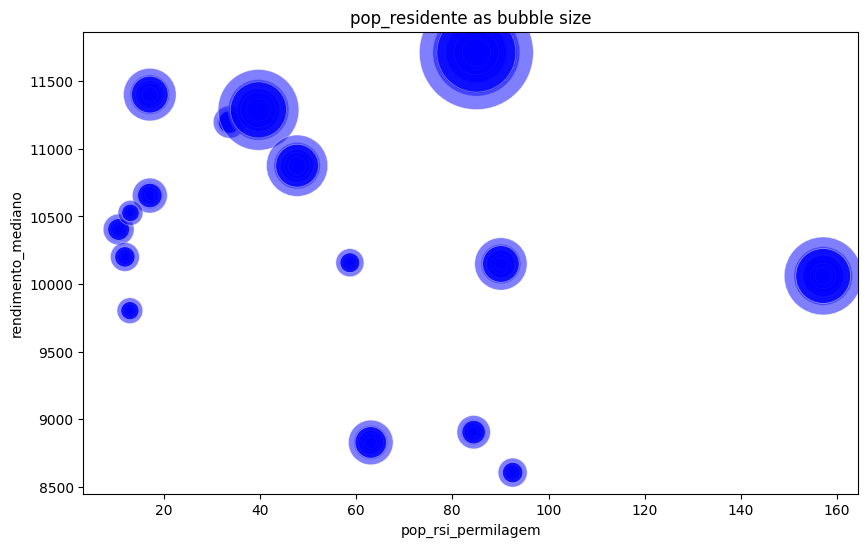

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
plt.scatter(
    df["rsi"],
    df["rendimento_mediano"],
    s=df["pop_residente"] / 10,
    alpha=0.5,
    color="blue",
    edgecolors="w",
    linewidth=0.5,
)

plt.xlabel("pop_rsi_permilagem")
plt.ylabel("rendimento_mediano")
plt.title("pop_residente as bubble size")

## Quintil Rendimento

In [29]:
api_params_quintis = {
    "lang": "PT",
    "varcd": "0012714",  # pop_residente
    "Dim1": "S7A2022",
    "Dim2": "<*>200",  # Açores, tão específico quanto possível
}

df = get_df(api_params_quintis)
df_quintis = df.loc[~df["valor"].isna()]
df_quintis

,ano,geocod,geodsg,dim_3,dim_3_t,ind_string,valor,sinal_conv,sinal_conv_desc
0,2022,200,Região Autónoma dos Açores,4,4º quintil,28 134,28134.0,None,None
1,2022,2004101,Vila do Porto,4,4º quintil,30 602,30602.0,None,None
6,2022,200410105,Vila do Porto,4,4º quintil,35 507,35507.0,None,None
7,2022,2004201,Lagoa (R.A.A.),4,4º quintil,25 795,25795.0,None,None
10,2022,200420103,Lagoa (Nossa Senhora do Rosário),4,4º quintil,32 884,32884.0,None,None
...,...,...,...,...,...,...,...,...,...
681,2022,2004206,Vila Franca do Campo,3,3º quintil,12 908,12908.0,None,None
683,2022,200420602,Ponta Garça,3,3º quintil,11 567,11567.0,None,None
688,2022,2004301,Angra do Heroísmo,3,3º quintil,17 534,17534.0,None,None
690,2022,200430102,Angra (Nossa Senhora da Conceição),3,3º quintil,16 341,16341.0,None,None


### Plot quintil

<Figure size 2000x1200 with 0 Axes>

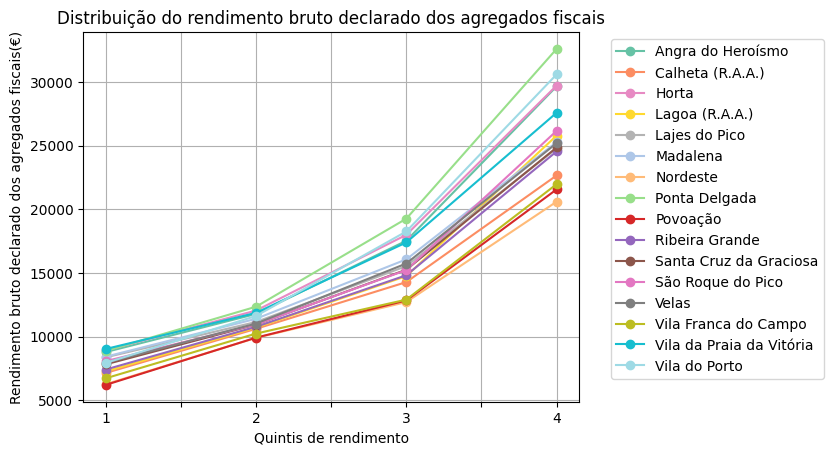

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


df_qs = df_quintis[df_quintis['geocod'].apply(len) == 7]# Nivel Municipal
pivot_df = df_qs.pivot(index='dim_3', columns='geodsg', values='valor')
colors_tab20 = plt.get_cmap('tab20').colors
colors_tab10 = plt.get_cmap('Set2').colors
colors = colors_tab10 + colors_tab20

cmap = ListedColormap(colors)
plt.figure(figsize=(20,12))  # Set width and height in inches
pivot_df.plot(marker='o', cmap=cmap)
plt.xlabel('Quintis de rendimento')
plt.ylabel('Rendimento bruto declarado dos agregados fiscais(€)')
plt.title('Distribuição do rendimento bruto declarado dos agregados fiscais')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()